In [11]:
import sys
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)
print("Matplotlib version: ", ml.__version__)

Python version:  3.5.1 |Anaconda 2.4.0 (64-bit)| (default, Dec  7 2015, 11:16:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Pandas version:  0.17.1
Matplotlib version:  1.5.1


# Airbnb Data

First we read in the data

In [7]:
url1 = "http://data.insideairbnb.com/united-states/"
url2 = "ny/new-york-city/2016-02-02/data/listings.csv.gz"
full_df = pd.read_csv(url1+url2, compression="gzip")

full_df.head()

/home/chase/Programming/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6627449,https://www.airbnb.com/rooms/6627449,20160201235331,2016-02-02,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,10,f,NaN,NaN,f,flexible,f,f,1,1.12
1,7949480,https://www.airbnb.com/rooms/7949480,20160201235331,2016-02-02,City Island Sanctuary Sunny BR & BA,Sunny relaxing room w/ adjacent pvt. bath in a...,We have just moved to City Island from CA so w...,Sunny relaxing room w/ adjacent pvt. bath in a...,none,City Island is a unique sanctuary in New York ...,...,10,f,NaN,NaN,f,moderate,t,t,1,1.00
2,1886820,https://www.airbnb.com/rooms/1886820,20160201235331,2016-02-02,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN
3,5557381,https://www.airbnb.com/rooms/5557381,20160201235331,2016-02-02,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",none,"City Island is unique in two ways. First, you ...",...,9,f,NaN,NaN,t,moderate,f,f,1,4.84
4,9019702,https://www.airbnb.com/rooms/9019702,20160201235331,2016-02-02,City Island Sugar Shack,Cozy street off of trendy City Island . Home i...,NaN,Cozy street off of trendy City Island . Home i...,none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


We don't want all data, so let's focus on a few variables.

In [136]:
df = full_df[["id", "price", "number_of_reviews", "review_scores_rating"]]

df.head()

,id,price,number_of_reviews,review_scores_rating
0,6627449,$125.00,8,93
1,7949480,$68.00,1,100
2,1886820,$300.00,0,NaN
3,5557381,$49.00,41,96
4,9019702,$200.00,0,NaN


Need to convert prices to floats

In [137]:
df.replace({'price': {'\$': ''}}, regex=True, inplace=True)
df.replace({'price': {'\,': ''}}, regex=True, inplace=True)
df['price'] = df['price'].astype('float64', copy=False)

/home/chase/Programming/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/home/chase/Programming/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


We might think that better apartments get rented more often, let's plot a scatter (or multiple boxes?) plot of the number of reviews vs the review score

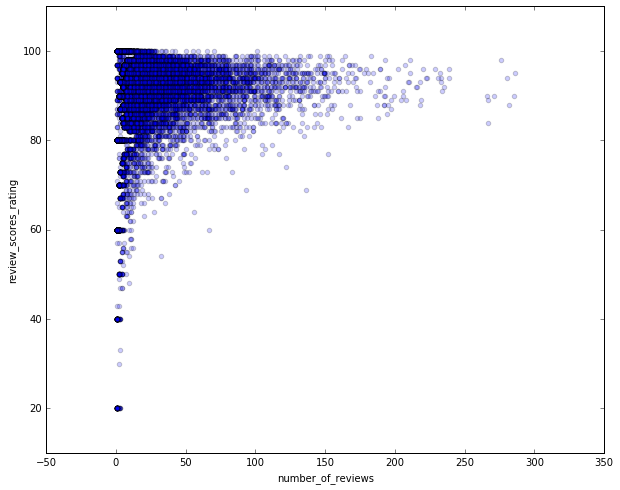

In [15]:
df.plot.scatter(x="number_of_reviews", y="review_scores_rating", figsize=(10, 8), alpha=0.2)

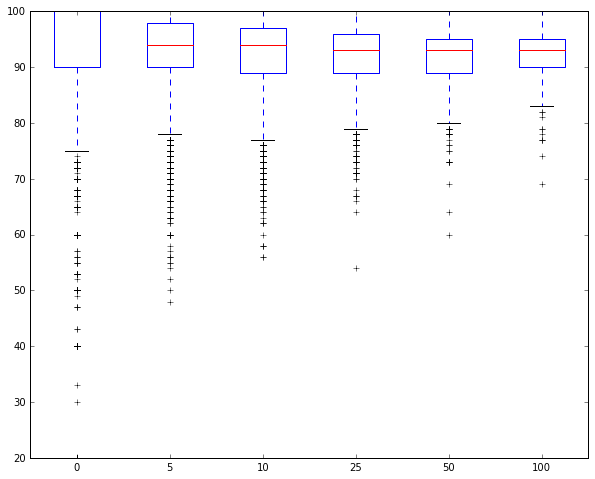

In [56]:
bins = [0, 5, 10, 25, 50, 100, 350]
boxplot_vecs = []

fig, ax = plt.subplots(figsize=(10, 8))

for i in range(1, 7):
    lb = bins[i-1]
    ub = bins[i]
    foo = df["review_scores_rating"][df["number_of_reviews"].apply(lambda x: lb <= x <= ub)].dropna()
    boxplot_vecs.append(foo.values)
    
ax.boxplot(boxplot_vecs, labels=bins[:-1])
plt.show()

Better reviews also are correlated with higher prices

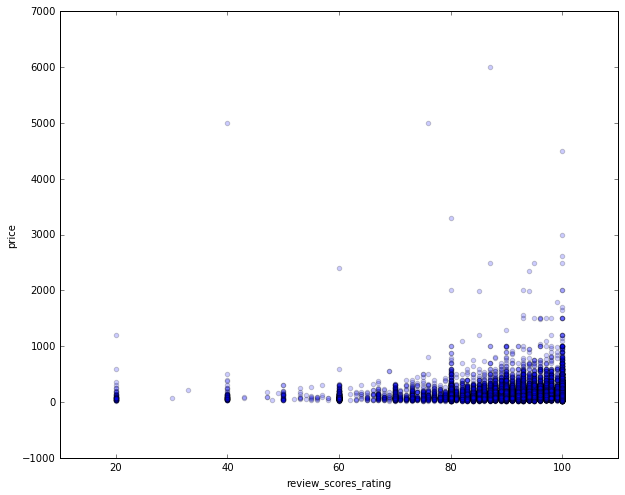

In [141]:
df.plot.scatter(x="review_scores_rating", y="price", figsize=(10, 8), alpha=0.2)